# Ecuaciones en derivadas parciales con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Ecuaciones en Derivadas Parciales con python" title="Ecuaciones en Derivadas Parciales con python" src="http://relopezbriega.github.io/images/PDE.png
" height="120" width="500">

## Introducción

Nuestra comprensión de los procesos fundamentales de la naturaleza se basa en gran medida en [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales). Ejemplos de ello son las vibraciones de los sólidos, la dinámica de los fluidos, la difusión de los productos químicos, la propagación del calor, la estructura de las moléculas, las interacciones entre fotones y electrones, y la radiación de ondas electromagnéticas. Las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) también juegan un papel central en las matemáticas modernas, especialmente en la [geometría](https://es.wikipedia.org/wiki/Geometr%C3%ADa) y el [análisis](https://es.wikipedia.org/wiki/An%C3%A1lisis_matem%C3%A1tico); lo que las convierte en una herramienta de suma utilidad que debemos conocer.

**_Nota_**: Este artículo corresponde a la tercer entrega de mi serie de artículos sobre [Cálculo](https://es.wikipedia.org/wiki/C%C3%A1lculo_infinitesimal) con [Python](https://www.python.org/); los anteriores fueron: [Introducción al Cálculo](http://relopezbriega.github.io/blog/2015/12/02/introduccion-al-calculo-con-python/) y [Ecuaciones Diferenciales con Python](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/), los cuales es recomendable haber leído previamente.

## ¿Qué es una ecuación en derivadas parciales?

Una [Ecuación en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) es una ecuación que, como su nombre lo indica, contiene [derivadas parciales](https://es.wikipedia.org/wiki/Derivada_parcial). A diferencia de lo que habíamos visto con las [ecuaciones diferenciales ordinarias](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/), en donde la función incógnita depende **solo** de *una variable*; en las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), o [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) para abreviar, la función incógnita va a depender de **dos o más** *variables independientes* $x, y, \dots$. Generalmente a la función incógnita la vamos a expresar como $u(x, y, \dots)$ y a sus derivadas parciales como $\partial u / \partial x = u_x$ o  $\partial u / \partial y = u_y$ dependiendo de sobre que variable estemos derivando. Entonces una [Ecuación en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) va a ser la identidad que relaciona a las *variables independientes* ($x, y, \dots$), con la *variable dependiente* $u$ (nuestra función incógnita), y las [derivadas parciales](https://es.wikipedia.org/wiki/Derivada_parcial) de $u$. Lo podríamos expresar de la siguiente forma:

$$F(x, y, u(x, y), u_x(x, y), u_y(x, y)) = F(x, y, u, u_x, u_y) = 0$$

Al igual de como pasaba con las [ecuaciones diferenciales ordinarias](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/), el ***orden*** de una [Ecuación en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) va a estar dado por la mayor [derivada](https://es.wikipedia.org/wiki/Derivada) presente. Por lo tanto, el caso que expresamos más arriba corresponde a una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), con dos *variables independientes*, de *primer orden*. Si quisiéramos expresar una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de *segundo orden*, podríamos hacerlo de la siguiente manera:

$$F(x, y, u, u_x, u_y, u_{xx}, u_{xy}, u_{yy})=0.$$

### Clasificación de ecuaciones en derivadas parciales

La clasificación de las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) va a ser algo fundamental, ya que la teoría y los métodos para poder solucionarlas van a depender de la *clase* de ecuación con la que estemos tratando. Las clasificaciones más importantes que debemos tener en cuenta, son:

1- **El *orden* de la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales):** Como ya mencionamos, el mismo va a estar dado por el *orden* de la mayor [derivada](https://es.wikipedia.org/wiki/Derivada) presente.


2- **Número de variables:** Esta clasificación va a estar dada por la cantidad de *variables independientes* que contenga la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales).


3- **Linealidad:** Esta es una de las clasificaciones más importantes, vamos a poder clasificar a las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) en [lineales](https://es.wikipedia.org/wiki/Lineal) o [no lineales](https://es.wikipedia.org/wiki/No_linealidad). En las [lineales](https://es.wikipedia.org/wiki/Lineal), la *variable dependiente* $u$ y todas sus derivadas, van a aparecer en una forma *lineal*, es decir, que van a tener *grado* uno (no van a estar elevadas al cuadrado, o multiplicadas entre sí). Más precisamente, una [Ecuación en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de segundo orden con dos variables, va a tomar la siguiente forma:

$$Au_{xx} + Bu_{xy} + Cu_{yy} + Du_x + Eu_y + Fu = G$$

en donde $A, B, C, D, E, F,$ y $G$ pueden ser *<a href="https://es.wikipedia.org/wiki/Constante_(matem%C3%A1ticas)">constantes</a>* o una *función* dada de $x$ e $y$. Por ejemplo:

$u_{tt} = e^tu_{xx} + \sin t$,    sería una ecuación [lineal](https://es.wikipedia.org/wiki/Lineal).

$uu_{xx} + u_y = 0$,  sería una ecuación [no lineal](https://es.wikipedia.org/wiki/No_linealidad).

$u_{xx} + yu_{yy} + u_x = 0$, sería una ecuación [lineal](https://es.wikipedia.org/wiki/Lineal).

$xu_x + yu_y + u^2 = 0$, sería una ecuación [no lineal](https://es.wikipedia.org/wiki/No_linealidad).

**Tipos de ecuaciones lineales:** Asimismo, a las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) [lineales](https://es.wikipedia.org/wiki/Lineal) de segundo orden las vamos a poder subdividir en las siguientes categorías:

* **[Ecuaciones parabólicas](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_parab%C3%B3lica_en_derivadas_parciales)**: Las cuales van a describir el *[flujo del calor](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_del_calor)* y el proceso de *[difusión](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_difusi%C3%B3n)*. Éstas ecuaciones van a satisfacer la condición $B^2 -4AC = 0$.

* **[Ecuaciones hiperbólicas](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_hiperb%C3%B3lica_en_derivadas_parciales)**: Las cuales describen los *[sistemas de vibración](https://es.wikipedia.org/wiki/Vibraci%C3%B3n)* y los *[movimientos de ondas](https://es.wikipedia.org/wiki/Onda)*. Satisfacen la condición $B^2 -4AC > 0$.

* **[Ecuaciones Elípticas](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_el%C3%ADptica_en_derivadas_parciales)**: Las cuales describen los fenómenos de *[estados estacionarios](https://es.wikipedia.org/wiki/Estado_estacionario)* y satisfacen la condición $B^2 -4AC < 0$.

4- **Homogeneidad:** Otra clasificación que podemos utilizar, es la de homogeneidad. Una ecuación va a ser *homogénea*, si el lado derecho de la ecuación, $G(x, y)$, es idénticamente cero para todo $x$ e $y$. En caso contrario, se la llama *no homogénea*.

5- **Tipos de coeficientes:** Por último, podemos clasificar a las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de acuerdo a sus coeficientes $A, B, C, D, E, $ y $F$, si los mismos son *<a href="https://es.wikipedia.org/wiki/Constante_(matem%C3%A1ticas)">constantes</a>*, se dice que la ecuación es de *coeficientes constantes*, en caso contrario será de *coeficientes variables*.

### ¿Cómo resolver ecuaciones en derivadas parciales?

Existen varios métodos que podemos utilizar para intentar resolver las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), la principal idea detrás la mayoría de estos métodos es la transformar a estas ecuaciones en [ecuaciones diferenciales ordinarias](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/) ([EDO](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_diferencial_ordinaria)), o en alguna [ecuación algebraica](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_algebraica); las cuales son más sencillas de resolver. Algunos los métodos que podemos utilizar son:

1- **El [método de separación de variables](https://es.wikipedia.org/wiki/M%C3%A9todo_de_separaci%C3%B3n_de_variables):** Este método es uno de los más importantes y más productivos a la hora de resolver a las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales). La idea es reducir a la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de $n$ variables, en $n$ [EDOs](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_diferencial_ordinaria).

2- **El método de la [transformada integral](https://es.wikipedia.org/wiki/Transformada_integral):** Este método es similar al que ya vimos al resolver [EDOs](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/). La idea es aplicar una [transformada integral](https://es.wikipedia.org/wiki/Transformada_integral) para reducir una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de $n$ variables, en otra de $n - 1$ variables. De esta forma una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de 2 variables, puede ser transformada en una [EDO](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_diferencial_ordinaria).

3- **El método del [cambio de coordenadas](https://es.wikipedia.org/wiki/Sistema_de_coordenadas#Cambios_de_coordenadas):** Este método intenta cambiar a la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) original en una [EDO](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_diferencial_ordinaria) o en otra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) más sencilla de resolver por medio del cambio de coordenadas del problema.

4- **El método de [perturbación](https://es.wikipedia.org/wiki/Teor%C3%ADa_perturbacional):** Este método aplica la [teoría perturbacional](https://es.wikipedia.org/wiki/Teor%C3%ADa_perturbacional) para intentar cambiar un problema de [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) [no lineal](https://es.wikipedia.org/wiki/No_linealidad) en una serie de problemas [lineales](https://es.wikipedia.org/wiki/Lineal) que se aproximan al [no lineal](https://es.wikipedia.org/wiki/No_linealidad) original.

5- **El método de expansión de [autofunciones](https://es.wikipedia.org/wiki/Autofunci%C3%B3n):** Este método intentan encontrar la solución de una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) como una suma infinita de [autofunciones](https://es.wikipedia.org/wiki/Autofunci%C3%B3n). Estas [autofunciones](https://es.wikipedia.org/wiki/Autofunci%C3%B3n) son halladas por medio de la resolución del problema del [valor propio](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) que corresponde al problema original.

6- **El método de las [ecuaciones integrales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_integral)**: Este método convierte a la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) en una [ecuación integral](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_integral); la cual luego es resuelta aplicando ciertas técnicas particulares que se aplican a ese tipo ecuaciones.

7- **Métodos numéricos**: La mayoría de las técnicas para resolver numéricamente a las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) se basan en la idea
de discretizar el problema en cada variable independiente que se produce en la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), y de esta forma, reformular el problema en una forma algebraica. Esto usualmente resulta en problemas de [álgebra lineal](https://es.wikipedia.org/wiki/%C3%81lgebra_lineal) de gran escala. Dos  de las técnicas principales para reformular las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) a una forma algebraica son, los [métodos de diferencias finitas](https://es.wikipedia.org/wiki/M%C3%A9todo_de_las_diferencias_finitas) (MDF), donde las [derivadas](https://es.wikipedia.org/wiki/Derivada) del problema son aproximadas por medio de la fórmula de [diferencias finitas](https://es.wikipedia.org/wiki/Diferencia_finita); y los [métodos de los elementos finitos](https://es.wikipedia.org/wiki/M%C3%A9todo_de_los_elementos_finitos) (MEF), en donde la función incógnita se escribe como combinación lineal de funciones de base simple que pueden ser derivadas e integradas fácilmente. En muchos casos, estos métodos numéricos van a ser las únicas herramientas que podamos utilizar para resolver a las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales).

### Solución de ecuaciones en derivadas parciales básicas 

Como resolver este tipo de ecuaciones es una tarea realmente complicada, vamos a empezar por resolver analíticamente las más fáciles para ganar confianza y así luego poder pasar a ecuaciones más complicadas. 

La más simple de las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) que nos podemos encontrar es:

$u_x = 0$, en donde $u = u(x, y)$.

Esta ecuación nos dice que la [derivada parcial](https://es.wikipedia.org/wiki/Derivada_parcial) de $u$ con respecto a $x$ es cero, lo que significa que $u$ no depende de $x$. Por lo tanto, la solución de esta ecuación va a ser $u=f(y)$, en donde $f$ es una función arbitraria de una variable. Por ejemplo, $u = y^2 - y$ podría ser una posible solución.

Subiendo un poco más la complejidad, podemos pasar a una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de segundo orden, como la siguiente:

$u_{xx} = 0$

En este caso, podemos integrar una vez $u_{xx}$ para obtener $u_x(x, y) = f(y)$. Si volvemos a integrar este resultado, podemos arribar a la solución final $u(x, y) = f(y)x + g(y)$, en donde $f$ y $g$ son dos funciones arbitrarias.

Por último, si quisiéramos resolver la siguiente [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales):

$u_{xy} = 0$

Primero integramos con respecto a $x$ tomando a $y$ como fija, de esta forma obtenemos $u_y(x, y) = f(y)$. Luego podemos integrar con respecto a $y$ tomando a $x$ como fija, y llegamos a la solución:

$u(x, y) = F(y) + g(x)$, en donde $F' = f$

Como podemos ver de estos ejemplos, las soluciones analíticas de las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) dependen de **funciones arbitrarias** (en lugar de *<a href="https://es.wikipedia.org/wiki/Constante_(matem%C3%A1ticas)">constantes</a>* arbitrarias como era el caso de las [EDO](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/)). Por lo tanto vamos a necesitar condiciones auxiliares para poder determinar una única solución.

### La condición inicial y la condición de frontera

Al igual que nos pasaba cuando vimos las [ecuaciones diferenciales ordinarias](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/); las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) pueden tener muchas soluciones, pero a nosotros nos va a interesar encontrar la solución para un caso particular; para lograr esto, debemos imponer unas condiciones auxiliares al problema original. Estas condiciones van a estar motivadas por la [Física](https://es.wikipedia.org/wiki/F%C3%ADsica) del problema que estemos analizando y pueden llevar a ser de dos tipos diferentes: [condiciones iniciales](https://en.wikipedia.org/wiki/Initial_condition) y [condiciones de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera).

La [condición inicial](https://en.wikipedia.org/wiki/Initial_condition) va a establecer el estado del problema al momento de tiempo cero, $t_0$. Por ejemplo para el problema de *[difusión](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_difusi%C3%B3n)*, la [condición inicial](https://en.wikipedia.org/wiki/Initial_condition) va a ser:

$$u(x, t_0) = \phi(x)$$

donde $\phi(x)= \phi(x, y, z)$ es una función que puede representar el estado de concentración inicial. Para el problema del *[flujo del calor](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_del_calor)*, $\phi(x)$ va a representar la temperatura inicial.

La [condición de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera) nos va a delimitar el *dominio* en el que nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) es válida. Así por ejemplo, volviendo al problema de *[difusión](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_difusi%C3%B3n)*, el *dominio* en el que nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) es válida, puede estar delimitado por la superficie del objeto que contiene al líquido. Existen varios tipos de [condiciones de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera), de las cuales las más importantes son:

* La **[condición de frontera de Dirichlet](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Dirichlet)**, en dónde los valores válidos de la función incógnita $u$ son especificados.

* La **[condición de frontera de Neumann](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Neumann)**, en donde los valores válidos especificados son dados para alguna de las derivadas de $u$.

* La **[condición de frontera de Robin](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Robin)**, en donde los valores válidos son especificados por una [combinación lineal](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) de una función y las derivadas de $u$.

### Interpretación geométrica de EDP de primer orden 

Las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de primer orden poseen una interpretación geométrica la cual nos puede facilitar alcanzar una solución general para ellas. 

#### Coeficientes constantes

Tomemos la siguiente ecuación de coeficientes constantes:

$au_x + bu_y = 0$, en donde $a$ y $b$ son *<a href="https://es.wikipedia.org/wiki/Constante_(matem%C3%A1ticas)">constantes</a>* y ambas no pueden ser cero.

En esta ecuación la cantidad  $au_x + bu_y$ es la derivada direccional de $u$ en la dirección del [vector](https://es.wikipedia.org/wiki/Vector) $V = (a, b) = ai + bj$. Como esta cantidad tiene que ser cero, esto significa que $u (x, y)$ debe ser constante en la dirección de $V$. El [vector](https://es.wikipedia.org/wiki/Vector) $(b, -a)$ es <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonal</a> a $V$, por lo tanto, las líneas paralelas a $V$ (ver el gráfico más abajo) tienen las ecuaciones $bx - ay$ constantes. (Se las llama las *líneas características*.) Entonces, la solución es constante en cada una de esas líneas. Por lo tanto, $u (x, y)$ depende de $bx - ay$ solamente. De esta forma podemos llegar a la solución general para este tipo de ecuaciones, que va a ser:

$u(x, y) = f(bx - ay)$, en donde $f$ es una función arbitraria de una variable.


<img alt="EDP de 1er orden con coef constantes" title="EDP de 1er orden con coef constantes" src="http://relopezbriega.github.io/images/PDE_Const.png
" >

Entonces, si por ejemplo, quisiéramos resolver la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), $4u_x - 3u_y= 0$, con la [condición de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera) que $u(0, y) = y^3$. Podemos aplicar la solución general que obtuvimos arriba y llegar al resultado $u(x, y) = f(-3x - 4y)$. Ahora, solo nos faltaría aplicar la condición para poder determinar cual es la función arbitraria $f$. Si sustituimos $x=0$ en nuestra solución, obtenemos $y^3 = f(-4y)$. Si decimos que $z = -4y$, entonces nuestra función es $f(z) = -z^3 / 64$. Por lo tanto la solución de nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) que satisface la [condición de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera) es $u(x, y) = (3x + 4y)^3 / 64$. 

#### Coeficientes variables

Consideremos ahora la siguiente [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de coeficientes variables:

$u_x + yu_y = 0$

Esta ecuación es similar a la que vimos anteriormente, con la diferencia de que ahora tenemos al coeficiente variable $y$. Utilizando la misma intuición geométrica que usamos antes, podemos ver que aquí también la derivada direccional de $u$ en el vector $v=(1, y)$ es constante, pero esta vez el vector no es constante, sino que es variable con $y$. Las curvas que tienen a $v$ como su vector tangente, tienen pendiente $y/1$, es decir:

$\frac{dy}{dx} = \frac{y}{1}$.

Podemos resolver esta ecuación como una [EDO](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_diferencial_ordinaria) y así obtener:

$y = Ce^x$, o lo que es lo mismo $e^{-x}y = C$.

La solución de nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) entonces va a ser constante en estas *curvas características* (ver gráfico); y van a responder a la siguiente solución general:

$u(x, y) = f(e^{-x}y)$, en donde $f$ es una función arbitraria.

<img alt="EDP de 1er orden con coef variables" title="EDP de 1er orden con coef variables" src="http://relopezbriega.github.io/images/PDE_Var.png
" >

## Resolviendo ecuaciones en derivadas parciales con Python

Es tiempo de nuevamente recurrir a nuestros queridos paquetes científicos de [Python](https://www.python.org/), [NumPy](http://www.numpy.org/), [Matplotlib](http://matplotlib.org/), [SymPy](http://www.sympy.org/es/) y [SciPy](http://www.scipy.org/) para ayudarnos a resolver las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales). Así como en el caso de las [Ecuaciones diferenciales ordinarias](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/) vimos que existía dentro del paquete [SymPy](http://www.sympy.org/es/), el solucionador genérico `sympy.dsolve`; para el caso de las [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), vamos a tener al solucionador [`sympy.pdsolve`](http://docs.sympy.org/dev/modules/solvers/pde.html). Aunque en este caso, es mucho más limitado que su versión para [EDO](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/); ya que solo vamos a poder resolver [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de primer orden. Veamos como funciona:

In [1]:
# <!-- collapse=True -->
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy 

# imprimir con notación matemática.
sympy.init_printing(use_latex='mathjax') 

In [2]:
# Defino las variables
x, y, u, z = sympy.symbols('x y u z')
f = sympy.Function('f')

In [3]:
# Defino la EDP 4u_x - 3u_y = 0
u = f(x, y)
u_x = u.diff(x)
u_y = u.diff(y)
eq = sympy.Eq(4*u_x - 3*u_y)
eq

  ∂               ∂              
4⋅──(f(x, y)) - 3⋅──(f(x, y)) = 0
  ∂x              ∂y             

In [4]:
# Resuelvo la ecuación
sympy.pdsolve(eq)

f(x, y) = F(-3⋅x - 4⋅y)

In [5]:
# Defino la EDP u_x + yu_y = 0
u = f(x, y)
u_x = u.diff(x)
u_y = u.diff(y)
eq2 = sympy.Eq(u_x + y*u_y)
eq2

  ∂             ∂              
y⋅──(f(x, y)) + ──(f(x, y)) = 0
  ∂y            ∂x             

In [6]:
# Resuelvo la ecuación
sympy.pdsolve(eq2)

           ⎛   -x⎞
f(x, y) = F⎝y⋅ℯ  ⎠

In [7]:
# Calsificación de EDP.
sympy.classify_pde(eq2)

('1st_linear_variable_coeff',)

Como podemos comprobar, obtuvimos los mismos resultados utilizando [`sympy.pdsolve`](http://docs.sympy.org/dev/modules/solvers/pde.html) que en nuestro análisis manual con la interpretación geométrica. Otra limitación que vamos a tener al trabajar con [`sympy.pdsolve`](http://docs.sympy.org/dev/modules/solvers/pde.html) es que no podemos aplicar nuestras condiciones auxiliares al problema, por lo que para despejar la función arbitraria, deberíamos hacer un trabajo manual. Asimismo, [SymPy](http://www.sympy.org/es/) también nos ofrece la función `classify_pde` la cual nos ayuda a saber con que tipo de [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) estamos tratando. (Recordemos que `pdsolve` solo puede resolver [EDPs](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) de primer orden).

### Separación de variables

Otra forma en que nos podemos ayudar de [SymPy](http://www.sympy.org/es/) para resolver [EDPs](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), es utilizando el [método de separación de variables](https://es.wikipedia.org/wiki/M%C3%A9todo_de_separaci%C3%B3n_de_variables). La característica esencial de esta técnica es transformar la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) en un conjunto de [EDOs](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/) (las cuales podemos solucionar con la ayuda de [SymPy](http://www.sympy.org/es/)). De esta forma, la solución requerida de la [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) se expresa como
un producto $u (x, y) = X (x) Y (y) \ne 0$, o como una suma $u (x, y) = X (x) + Y (y)$, donde $X (x)$ e $Y (y)$ son funciones de $x$ e $y$, respectivamente. Muchos de los problemas significativos en [ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) pueden ser resueltos por este método. Para ilustrar como funciona esta técnica, veamos un ejemplo. Vamos a resolver la siguiente [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales).

$y^2u_x^2 + x^2u_y^2 = (xyu)^2$, que cumple con la condición $u(x, 0) = 3e^{x^2/4}$.

Podemos entonces asumir que $u(x, y) = f(x) g(y) \ne 0$ es una *solución separable* de ella; por tanto lo reemplazamos en la ecuación para obtener:

$$y^2(f'(x) g(y))^2 + x^2(f(x) g'(y))^2 = x^2 y^2 (f(x) g(y))^2$$ 

lo que es equivalente a decir;

$$\frac{1}{x^2}\left(\frac{f'(x)}{f(x)}\right)^2 + \frac{1}{y^2}\left(\frac{g'(y)}{g(y)}\right)^2 = 1$$

Luego, ayudándonos de la *constante de separación* $\lambda^2$, podemos separar a esta ecuación en dos [EDOs](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/), del siguiente modo; primero igualamos la ecuación anterior a $\lambda^2$:

$$\frac{1}{x^2}\left(\frac{f'(x)}{f(x)}\right)^2 = 1 - \frac{1}{y^2}\left(\frac{g'(y)}{g(y)}\right)^2 = \lambda^2$$

y luego separamos ambas ecuaciones para obtener:

$$\frac{1}{x}\frac{f'(x)}{f(x)} = \lambda \\ \frac{g'(x)}{yg(y)}= \sqrt{1 - \lambda^2}$$

Ahora podemos utilizar `sympy.dsolve` para resolver ambas [EDOs](http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/):

In [8]:
# EDO n° 1
edo1 = sympy.Eq((1 / x) * (f(x).diff(x)/f(x)) - z)
edo1

     d           
     ──(f(x))    
     dx          
-z + ──────── = 0
      x⋅f(x)     

In [9]:
# Resolviendo EDO n° 1
sympy.dsolve(edo1)

            2  
           x ⋅z
           ────
            2  
f(x) = C₁⋅ℯ    

In [10]:
# EDO n° 2
edo2 = sympy.Eq((f(y).diff(y)) / (y*f(y)) - sympy.sqrt(1 - z**2))
edo2

                  d           
     __________   ──(f(y))    
    ╱    2        dy          
- ╲╱  - z  + 1  + ──────── = 0
                   y⋅f(y)     

In [11]:
# Resolviendo EDO n° 2
sympy.dsolve(edo2)

⎡               _______________                 _______________⎤
⎢              ╱  4 ⎛   2    ⎞                 ╱  4 ⎛   2    ⎞ ⎥
⎢           -╲╱  y ⋅⎝- z  + 1⎠               ╲╱  y ⋅⎝- z  + 1⎠ ⎥
⎢           ────────────────────             ──────────────────⎥
⎢                    2                               2         ⎥
⎣f(y) = C₁⋅ℯ                    , f(y) = C₁⋅ℯ                  ⎦

Entonces ahora podemos utilizar estos resultados para armar la solución final a nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) original, el cual va a ser:

$$u(x, y) = C e^{\frac{\lambda}{2}x^2 + \frac{1}{2}y^2\sqrt{1 - \lambda^2}}$$

En donde $C = C_1 C_2$ es una *constante arbitraria*.

Por último, utilizando la condición $u(x, 0) = 3e^{x^2/4}$, podemos despejar tanto a $C$ ($C=3$) como a $\lambda$ ($\lambda = 1/2$) y arribar a la solución final:

$$u(x, y) = 3 e^{\frac{1}{4}\left(x^2 + y^2\sqrt{3}\right)}$$

Si bien debemos realizar un trabajo manual previo, aun así [SymPy](http://www.sympy.org/es/) sigue siendo de gran ayuda para facilitarnos llegar a la solución final.

### Métodos numéricos - Método de Elementos Finitos

Por último, para cerrar este artículo, veamos como podemos aplicar el [métodos de los elementos finitos](https://es.wikipedia.org/wiki/M%C3%A9todo_de_los_elementos_finitos) (MEF) con [Python](https://www.python.org/). Para esto nos vamos ayudar de la librería [FEniCS](http://fenicsproject.org/), la cual es un *framework* para resolver numéricamente problemas generales de [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) utilizando el [métodos de los elementos finitos](https://es.wikipedia.org/wiki/M%C3%A9todo_de_los_elementos_finitos). Para instalar esta librería en [Ubuntu](http://www.ubuntulinux.org/), pueden utilizar los siguientes comandos:

```
sudo add-apt-repository ppa:fenics-packages/fenics
sudo apt-get update
sudo apt-get install fenics
```
Deben tener en cuenta que por ahora solo funciona con [Python 2](https://www.python.org/downloads/release/python-2711/). La interfaz principal que vamos a utilizar para trabajar con este *framework* nos la proporcionan las librerías `dolfin` y `mshr`; las cuales debemos importar para poder trabajar con el. Una vez importadas, podemos configurar algunos de sus parámetros para lograr el comportamiento deseado.

In [12]:
# importando modulos de fenics
import dolfin
import mshr

dolfin.parameters["reorder_dofs_serial"] = False
dolfin.parameters["allow_extrapolation"] = True

El problema que vamos a resolver con la ayuda de [FEniCS](http://fenicsproject.org/), va a ser la siguiente [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales):

$$u_{xx} + u_{yy} = 0$$

Con las siguientes [condiciones de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera):

$$u(x=0) = 3 ; \ u(x=1)=-1 ; \ u(y=0) = -5 ; \ u(y=1) = 5$$  

El primer paso en la solución de una [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) utilizando el [métodos de los elementos finitos](https://es.wikipedia.org/wiki/M%C3%A9todo_de_los_elementos_finitos),  es definir una *[malla](https://es.wikipedia.org/wiki/Malla_poligonal)* que describa la discretización del *dominio* del problema. Para este caso, vamos a utilizar la función `RectangleMesh` que nos ofrece [FEniCS](http://fenicsproject.org/).

In [13]:
# Discretizando el problema
N1 = N2 = 75
mesh = dolfin.RectangleMesh(dolfin.Point(0, 0), dolfin.Point(1, 1), N1, N2)

El siguiente paso es definir una representación del [espacio funcional](https://es.wikipedia.org/wiki/Espacio_funcional) para las funciones de ensayo y prueba. Para esto vamos a utilizar la clase `FunctionSpace`. El constructor de esta clase tiene al menos tres argumentos: un objeto de *[malla](https://es.wikipedia.org/wiki/Malla_poligonal)*, el nombre del tipo de función base, y el grado de la función base. En este caso, vamos a utilizar la función de [Lagrange](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Lagrange).

In [14]:
# Funciones bases
V = dolfin.FunctionSpace(mesh, 'Lagrange', 1)
u = dolfin.TrialFunction(V)
v = dolfin.TestFunction(V)

DEBUG:FFC:Reusing form from cache.


Ahora debemos definir a nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) en su [formulación débil](https://es.wikipedia.org/wiki/Formulaci%C3%B3n_d%C3%A9bil_de_una_ecuaci%C3%B3n_diferencial) equivalente para poder tratarla como un problema de [álgebra lineal](https://es.wikipedia.org/wiki/%C3%81lgebra_lineal) que podamos resolver con el [MEF](https://es.wikipedia.org/wiki/M%C3%A9todo_de_los_elementos_finitos).

In [15]:
# Formulación debil de la EDP
a = dolfin.inner(dolfin.nabla_grad(u), dolfin.nabla_grad(v)) * dolfin.dx
f = dolfin.Constant(0.0)
L = f * v * dolfin.dx

Por último, solo nos falta definir las [condiciones de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera).

In [16]:
# Defino condiciones de frontera
def u0_top_boundary(x, on_boundary):
    return on_boundary and abs(x[1]-1) < 1e-8

def u0_bottom_boundary(x, on_boundary):
    return on_boundary and abs(x[1]) < 1e-8

def u0_left_boundary(x, on_boundary):
    return on_boundary and abs(x[0]) < 1e-8

def u0_right_boundary(x, on_boundary):
    return on_boundary and abs(x[0]-1) < 1e-8

In [17]:
# Definiendo condiciones de frontera de Dirichlet
bc_t = dolfin.DirichletBC(V, dolfin.Constant(5), u0_top_boundary)
bc_b = dolfin.DirichletBC(V, dolfin.Constant(-5), u0_bottom_boundary)
bc_l = dolfin.DirichletBC(V, dolfin.Constant(3), u0_left_boundary)
bc_r = dolfin.DirichletBC(V, dolfin.Constant(-1), u0_right_boundary)

# Lista de condiciones de frontera
bcs = [bc_t, bc_b, bc_r, bc_l]

Con esta especificación de las [condiciones de frontera](https://es.wikipedia.org/wiki/Problema_de_condici%C3%B3n_de_frontera), ya estamos listos para resolver nuestra [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) utilizando la función `dolfin.solve`. El vector resultante, luego lo podemos convertir a una matriz de [NumPy](http://www.numpy.org/) y utilizarla para graficar la solución con [Matplotlib](http://matplotlib.org/).

In [18]:
# Resolviendo la EDP
u_sol = dolfin.Function(V)
dolfin.solve(a == L, u_sol, bcs)

DEBUG:FFC:Reusing form from cache.
DEBUG:FFC:Reusing form from cache.


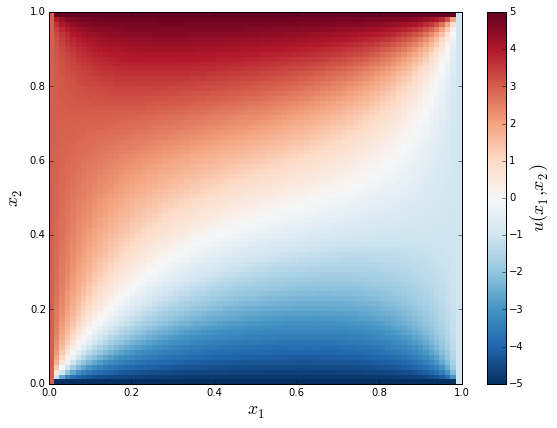

In [19]:
# graficando la solución
u_mat = u_sol.vector().array().reshape(N1+1, N2+1)

x = np.linspace(0, 1, N1+2)
y = np.linspace(0, 1, N1+2)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

c = ax.pcolor(X, Y, u_mat, vmin=-5, vmax=5, cmap=mpl.cm.get_cmap('RdBu_r'))
cb = plt.colorbar(c, ax=ax)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)
fig.tight_layout()

Para profundizar en como utilizar el *framework* [FEniCS](http://fenicsproject.org/), les recomiendo que visiten la [documentación](http://fenicsproject.org/documentation/tutorial/index.html) del sitio, que tienen varios ejemplos.

Con esto concluyo este artículo. Obviamente, no es más que una introducción al fascinante y complejo mundo de las [Ecuaciones en derivadas parciales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales), cada clase de [EDP](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_en_derivadas_parciales) es un mundo en sí mismo y quedaron muchos temas sin tratar; los cuales tal vez profundice en algún otro artículo. Espero que les pueda servir como referencia y lo hayan encontrado instructivo.

Saludos!

*Este post fue escrito utilizando Jupyter notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyPDE.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyPDE.ipynb).*